In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from constants import MU, BETA4
from mottmassey import mm_potential
from phase_shifts import delta_interp, delta_ivp

plt.style.use('science')
ratio = 4/3
h = 3

In [2]:
ks = np.hstack(
    (np.logspace(np.log10(0.1/BETA4), np.log10(10/BETA4), 50),
     np.linspace(10.1/BETA4, 100/BETA4, 50))
)
energies = ks**2/(2*MU)

In [3]:
pot = mm_potential

In [13]:
%%time
delta_interp(pot, energies[0], r_match=50, max_rel_diff=1e-7, factor=1.01)

CPU times: user 119 ms, sys: 4.36 ms, total: 124 ms
Wall time: 120 ms


(0.17823315969820905, 960.3245198211235)

In [15]:
r = np.linspace(100, 300, 50)

ds = np.array([delta_interp(pot, energies[0], r_match=r_i, max_rel_diff=1e-7, factor=1.01) for r_i in r])
    

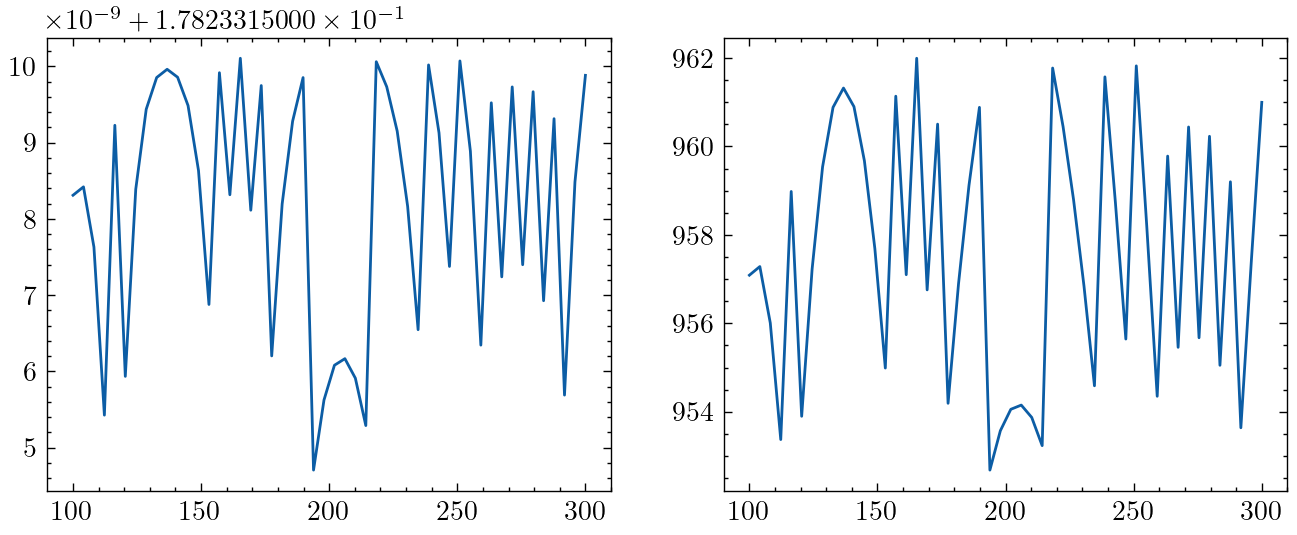

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
fig.patch.set_facecolor('white')

ax[0].plot(r, ds[:, 0])
ax[1].plot(r, ds[:, 1]);

In [17]:
%%time
deltas = np.array([delta_interp(pot, en, r_match=50, max_rel_diff=1e-7, factor=1.01)[0] for en in energies])

/Users/danielodell/id-eft/free_solutions.py:80: RuntimeWarning: divide by zero encountered in true_divide
  rl = 1/x0 * (u_func(x0)/derivative(u_func, x0, dx=dx))
/Users/danielodell/id-eft/free_solutions.py:82: RuntimeWarning: invalid value encountered in multiply
  (H_minus(x0, ell) - x0*rl*H_minus_prime(x0, ell)) /
/Users/danielodell/id-eft/free_solutions.py:83: RuntimeWarning: invalid value encountered in multiply
  (H_plus(x0, ell) - x0*rl*H_plus_prime(x0, ell))


CPU times: user 1min 1s, sys: 151 ms, total: 1min 1s
Wall time: 1min 1s


In [18]:
ks.shape, deltas.shape

((100,), (100,))

In [8]:
# deltas_mm = np.loadtxt('phase_shifts_mott_massey_wide_dense.txt')
# ks_mm = deltas_mm[:, 0]
# deltas_mm = deltas_mm[:, 1]

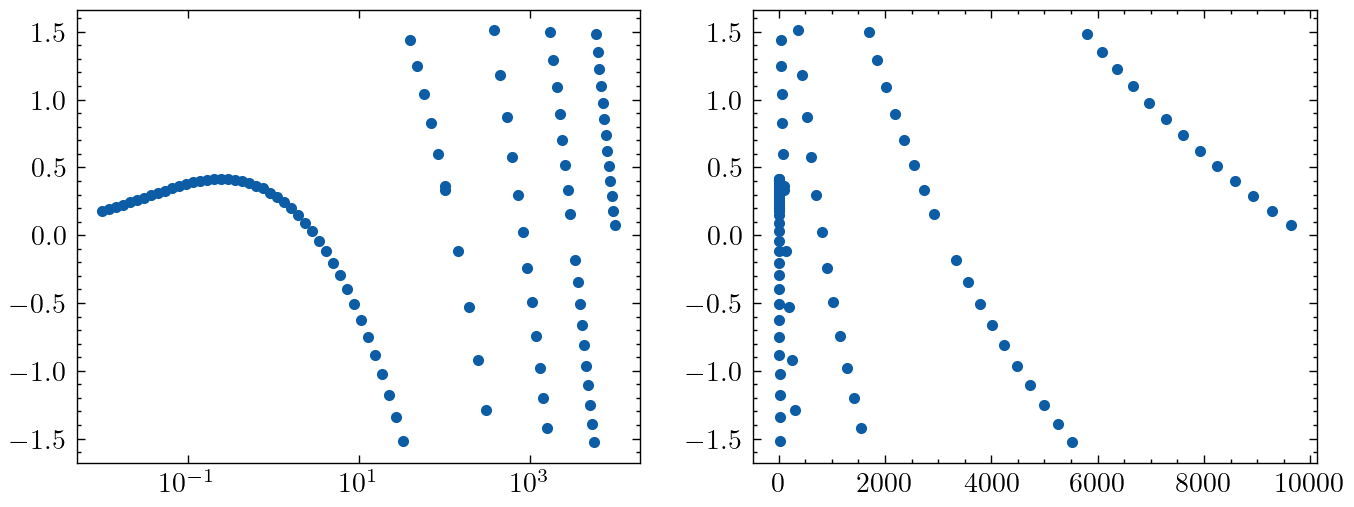

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
fig.patch.set_facecolor('white')

ax[0].scatter((ks*BETA4)**2, deltas, marker='.')
# ax[0].scatter((ks_mm*BETA4)**2, deltas_mm, marker='.')
ax[1].scatter((ks*BETA4)**2, deltas, marker='.')
# ax[1].scatter((ks_mm*BETA4)**2, deltas_mm, marker='.')

ax[0].set_xscale('log');

In [25]:
np.where(np.isnan(deltas))

(array([75, 99]),)

In [26]:
bad_energies = np.where(np.isnan(deltas))

good_deltas = np.delete(deltas, bad_energies)
good_ks = np.delete(ks, bad_energies)

np.savetxt('datfiles/phase_shifts/phase_shifts_mott_massey.txt', np.vstack((good_ks, good_deltas)).T)